# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？
(2) 影響外遇的原因是什麼？
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三倍         
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

# 1. import data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [2]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sns # For creating plots
sns.set_style('darkgrid')

In [3]:
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [5]:
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()

import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [6]:
#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [8]:
dataset = pd.read_csv('affairs.csv')

### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


In [9]:
dataset.describe()

,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


In [10]:
dataset.isnull().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

In [11]:
#如果有空值，刪掉
dataset.dropna(inplace = True)

In [12]:
#Remove customer IDs from the data set
df = dataset.iloc[:,0:]

df_dummies = pd.get_dummies(df)
df_dummies.loc[df_dummies['affairs'] >= 1, 'affairs'] = 1
df_dummies.head()

,affairs,age,yearsmarried,religiousness,education,occupation,rating,gender_female,gender_male,children_no,children_yes
0,0,37.0,10.00,3,18,7,4,0,1,1,0
1,0,27.0,4.00,4,14,6,4,1,0,1,0
2,0,32.0,15.00,1,12,1,4,1,0,0,1
3,0,57.0,15.00,5,18,6,5,0,1,0,1
4,0,22.0,0.75,2,17,6,3,0,1,1,0


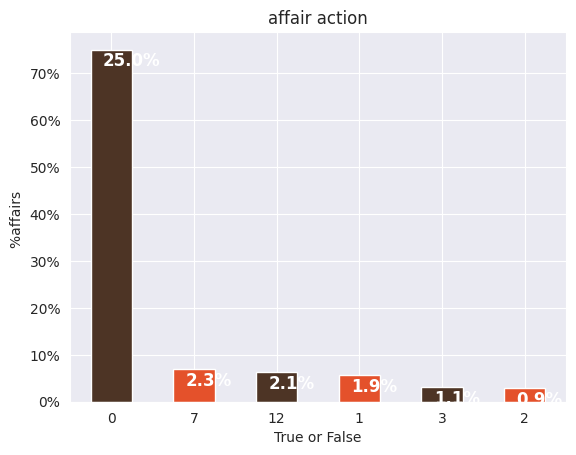

In [13]:
colors = ['#4D3425','#E4512B']
ax = (df['affairs'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('%affairs ')
ax.set_xlabel('True or False')
ax.set_title('affair action')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

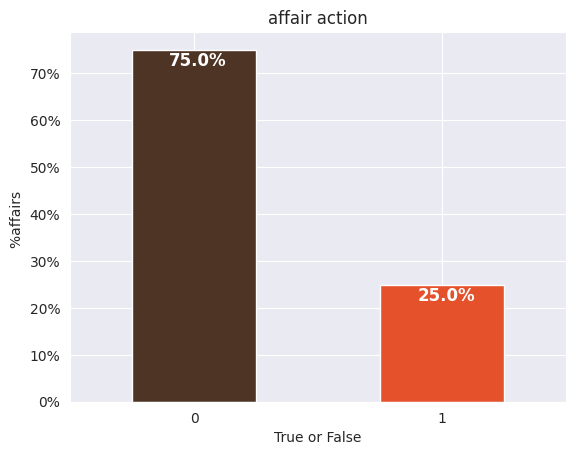

In [14]:
colors = ['#4D3425','#E4512B']
ax = (df_dummies['affairs'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('%affairs ')
ax.set_xlabel('True or False')
ax.set_title('affair action')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of affair action')

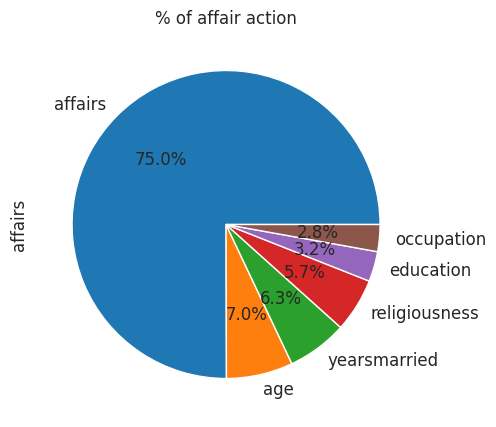

In [36]:
ax = (df['affairs'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['affairs','age','yearsmarried','religiousness','education','occupation','rating'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('affairs',fontsize = 12)
ax.set_title('% of affair action', fontsize = 12)

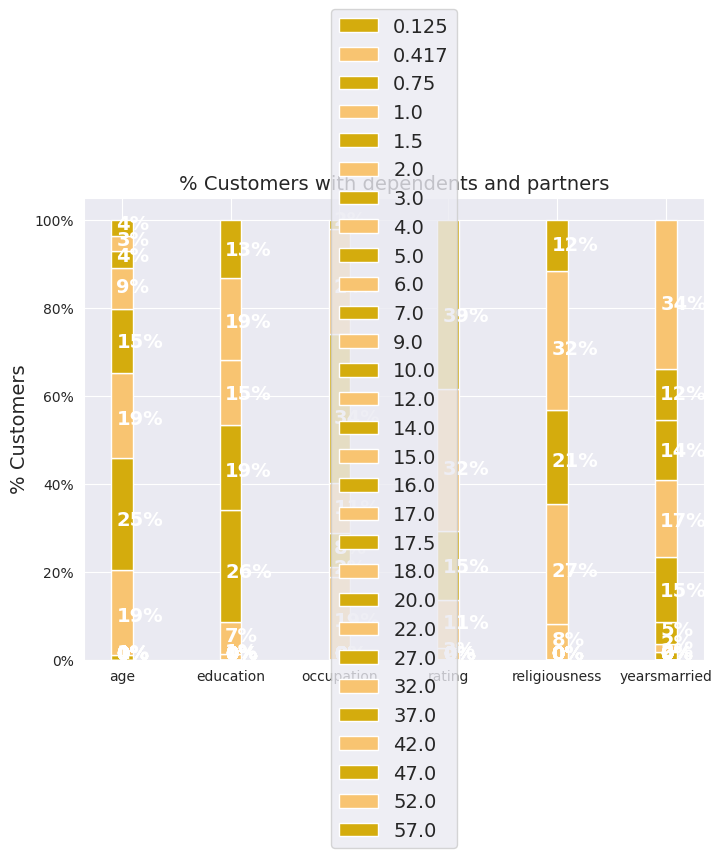

In [16]:
df2 = pd.melt(dataset, id_vars=['affairs'], value_vars=['age','yearsmarried','religiousness','education','occupation','rating'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(dataset)
colors = ['#D4AC0D','#F8C471']
ax = df3.loc[:,'affairs'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 14)

# Dependents: 客戶是否有家屬 (Yes, No)
# Partner: 客戶是否有合作夥伴 (Yes, No)

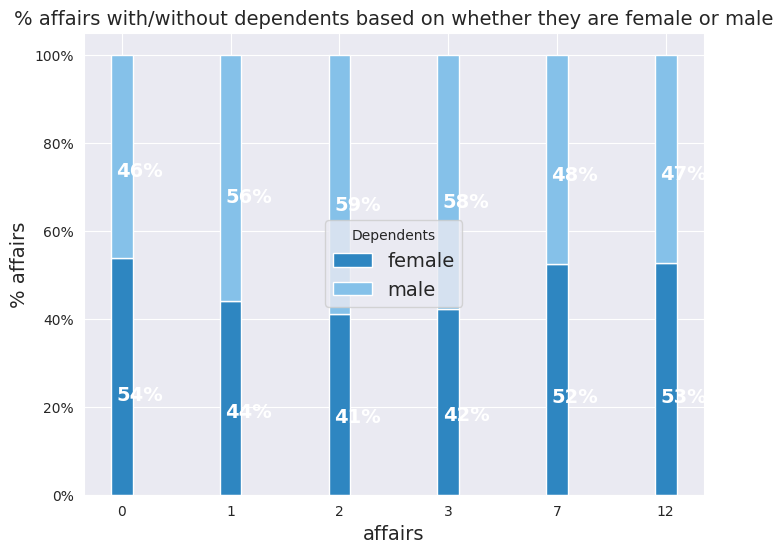

In [17]:
colors = ['#2E86C1','#85C1E9']
partner_dependents = dataset.groupby(['affairs','gender']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% affairs',size = 14)
ax.set_title('% affairs with/without dependents based on whether they are female or male',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, 'affair action')

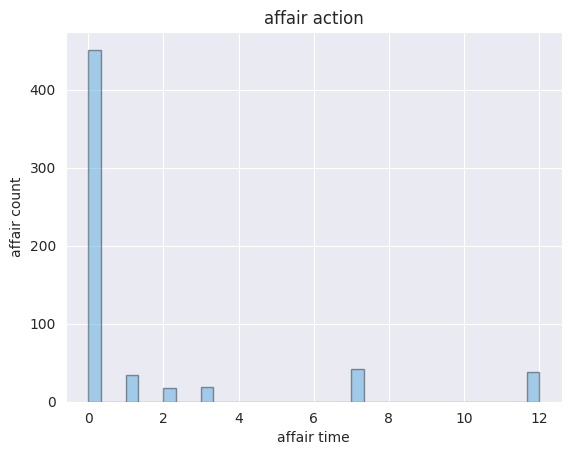

In [18]:
ax = sns.distplot(df['affairs'],
                  hist=True,
                  kde=False,
                  bins=int(180/5),
                  color = '#3498DB',
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth': 4})
ax.set_ylabel('affair count')
ax.set_xlabel( 'affair time')
ax.set_title('affair action')

Text(0.5, 1.0, 'affair Type')

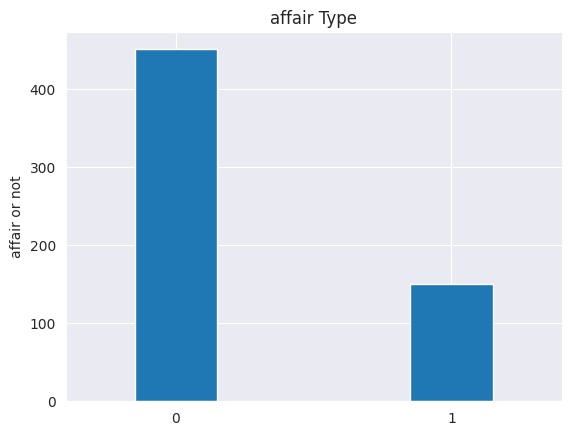

In [19]:
ax = df_dummies['affairs'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('affair or not')
ax.set_title('affair Type')

Text(0.5, 1.0, 'affair Type')

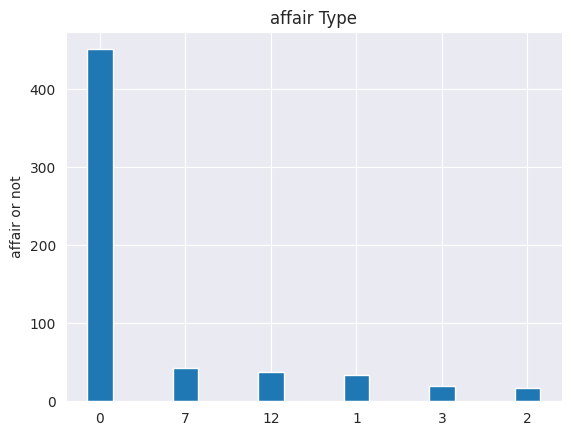

In [20]:
ax = df['affairs'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('affair or not')
ax.set_title('affair Type')

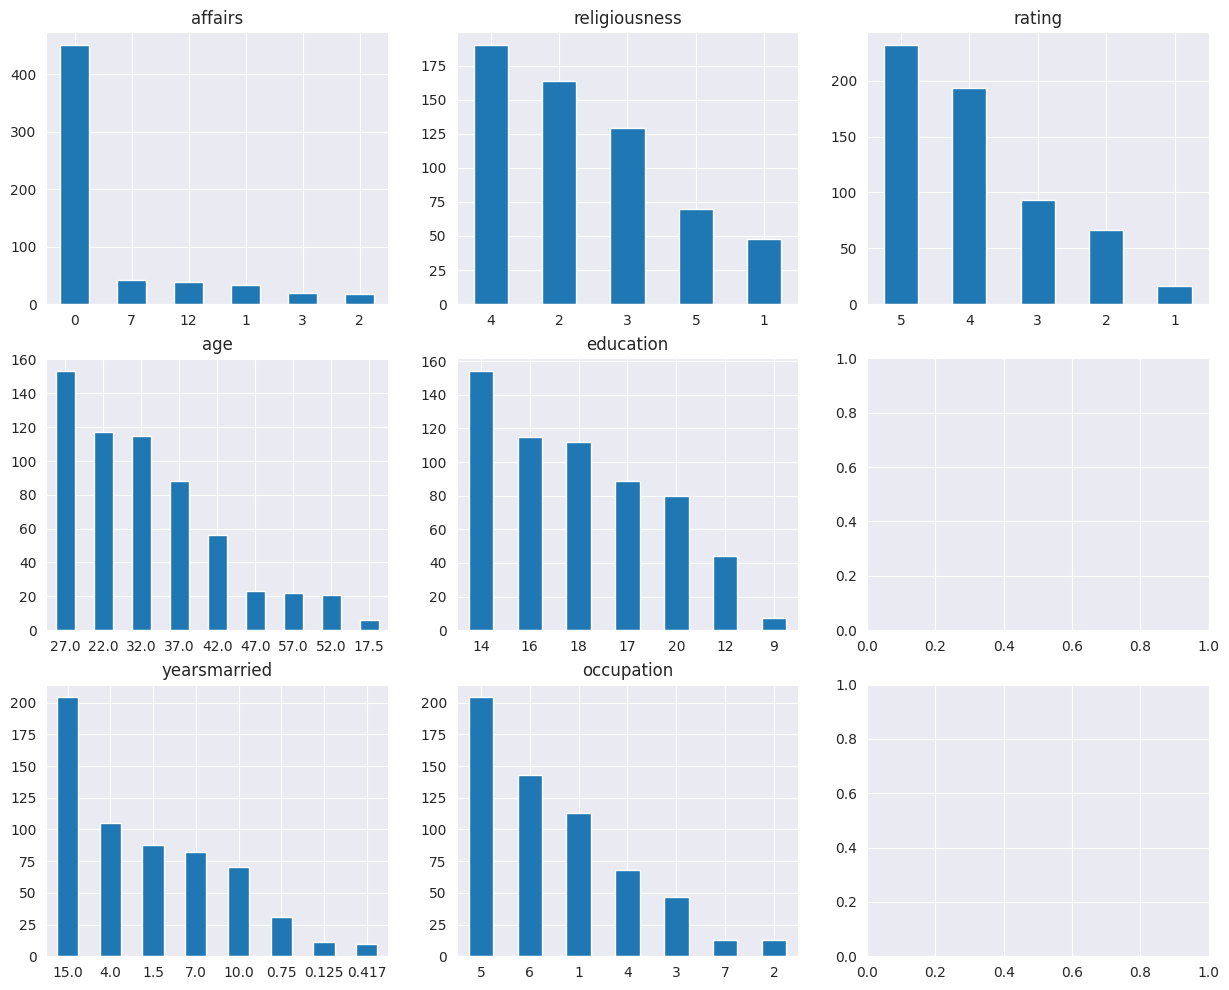

In [21]:
services = ['affairs',	'age'	,'yearsmarried',	'religiousness',	'education',	'occupation',	'rating']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)


In [22]:
P = df_dummies['affairs']
P['affairs or not'] = 100 * P.sum() / len(P)


<Axes: xlabel='affairs', ylabel='yearsmarried'>

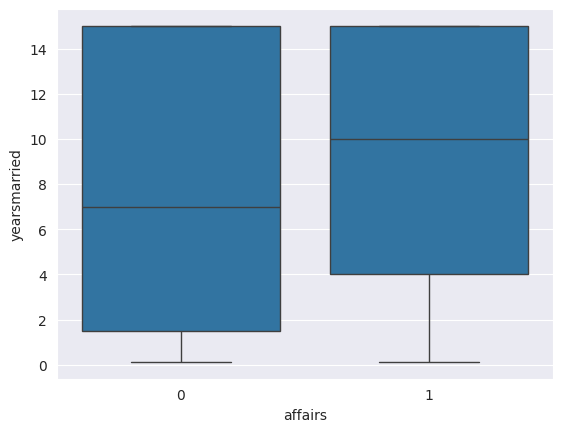

In [23]:
sns.boxplot(x=df_dummies['affairs'], y=df_dummies['yearsmarried'])

<Axes: xlabel='affairs', ylabel='age'>

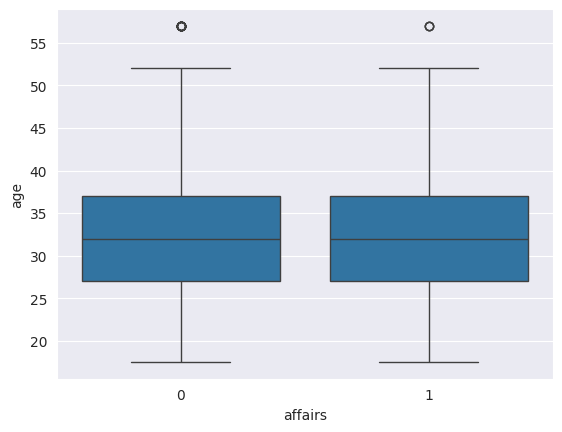

In [24]:
sns.boxplot(x=df_dummies['affairs'], y=df_dummies['age'])
#劈腿有可能跟年齡有關，因為平均有可能是被拉低拉高的

<Axes: xlabel='affairs', ylabel='religiousness'>

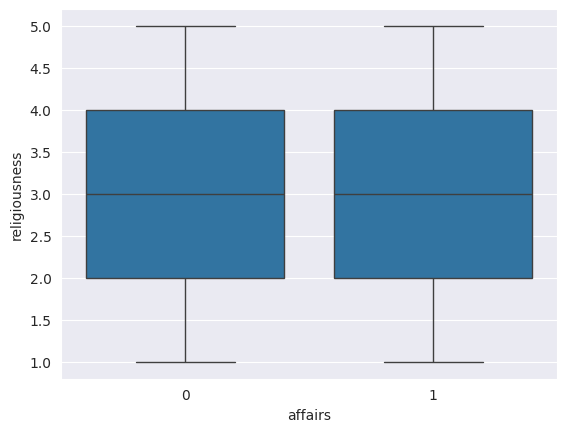

In [25]:
sns.boxplot(x=df_dummies['affairs'], y=df_dummies['religiousness'])
#劈腿跟信仰有可能有關

<Axes: xlabel='affairs', ylabel='education'>

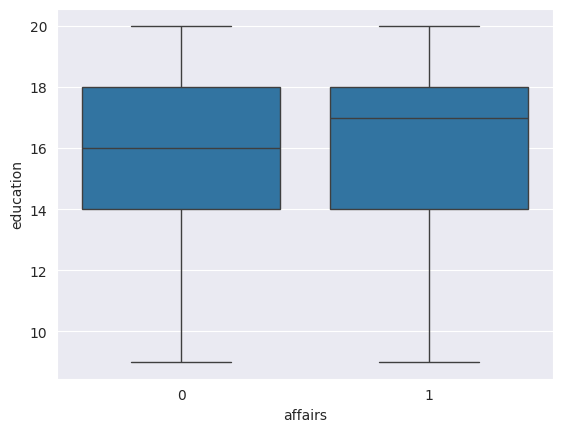

In [26]:
sns.boxplot(x=df_dummies['affairs'], y=df_dummies['education'])

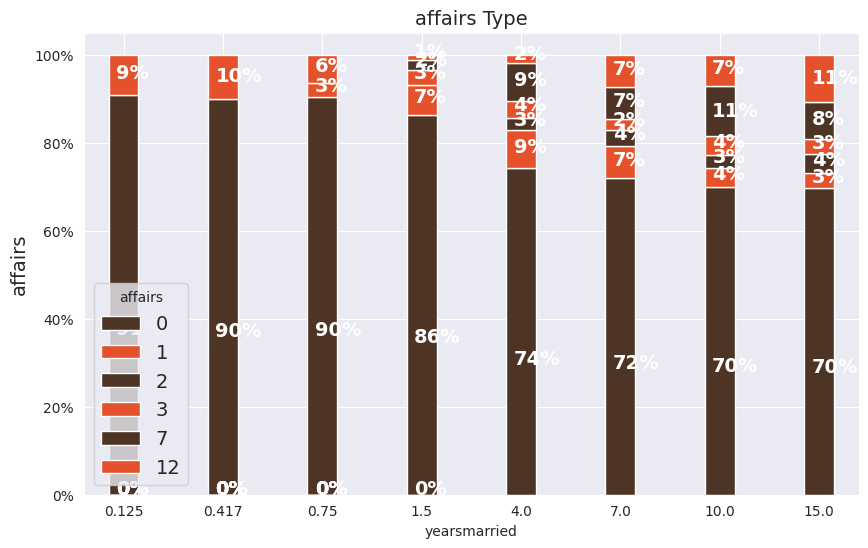

In [27]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['yearsmarried','affairs']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True,
                                      rot = 0, figsize = (10,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'affairs')
ax.set_ylabel('affairs',size = 14)
ax.set_title('affairs Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 14)
#好像沒差

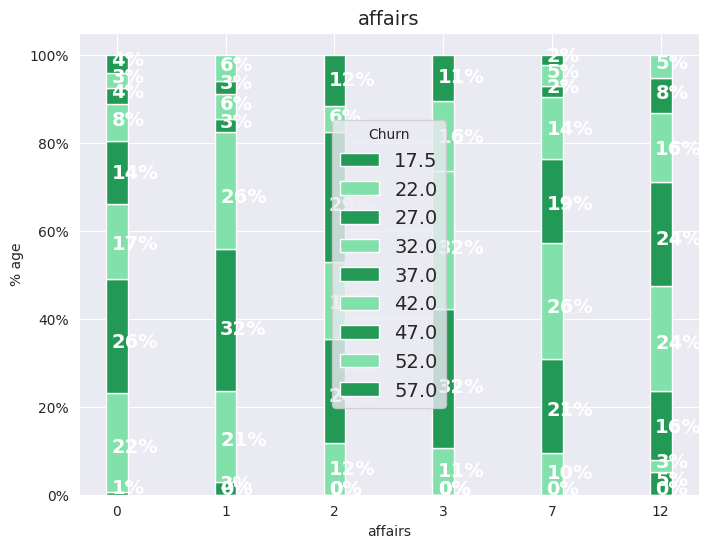

In [28]:
colors = ['#229954','#82E0AA']
seniority_churn = df.groupby(['affairs','age']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% age')
ax.set_title('affairs',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
#年齡似乎跟劈腿外遇沒有相關

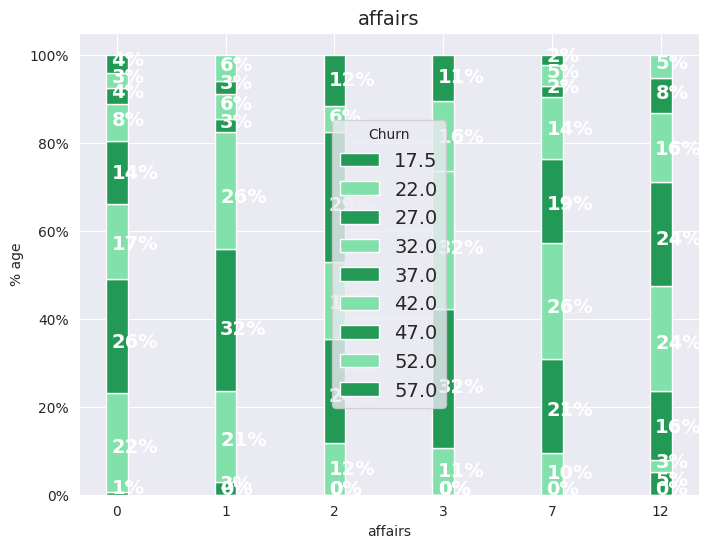

In [29]:
colors = ['#229954','#82E0AA']
seniority_churn = df.groupby(['affairs','age']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% age')
ax.set_title('affairs',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)
    #好像沒差

Text(0.5, 1.0, 'Distribution of total affair')

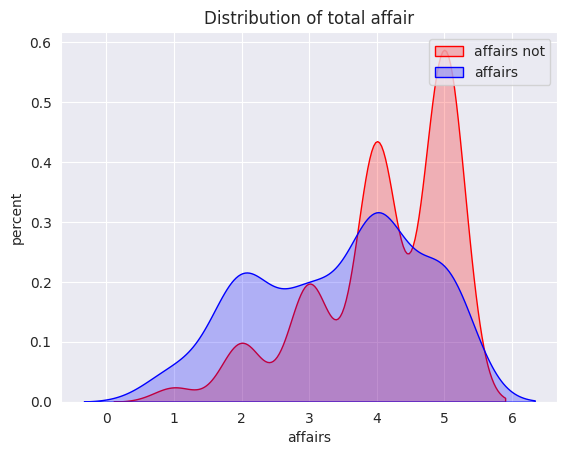

In [35]:
ax = sns.kdeplot(df_dummies.rating[(df_dummies["affairs"] != 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(df_dummies.rating[(df_dummies["affairs"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["affairs not","affairs"],loc='upper right')
ax.set_ylabel('percent')
ax.set_xlabel('affairs')
ax.set_title('Distribution of total affair')

1.logistic


In [ ]:
# We will use the data frame where we had created dummy variables
X = df_dummies.drop(columns = ['affairs'])
y = df_dummies['affairs'].values

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
result = model_log.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
y_test_pred_log = model_log.predict(X_test)

print (metrics.accuracy_score(y_test, y_test_pred_log))

0.8264462809917356


Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

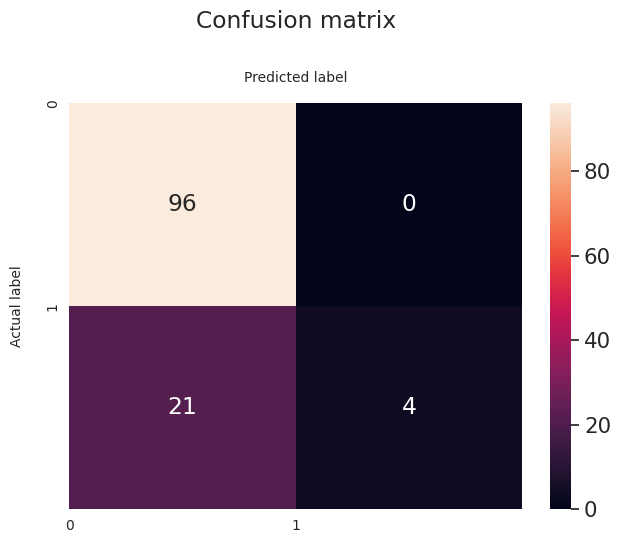

In [ ]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_log)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [29]:
def get_acccuracy(cm1):
  total = 0
  total = cm1[0,0]+cm1[1,1]+cm1[1,0]+cm1[0,1]
  accurancy = (cm1[0,0] + cm1[1,1])/total
  print('accurancy',accurancy)
def get_precision(cm1):
  total = 0
  total = cm1[1,1]+cm1[0,1]
  precision = cm1[0,0]/total
  print('precision',precision)
def get_sensitivity(cm1):
  total = 0
  total = cm1[1,1]+cm1[1,0]
  sensitivity = cm1[1,1]/total
  print('sensitivity',sensitivity)
def get_precision(cm1):
  total = 0
  total = cm1[0,0]+cm1[0,1]
  precision = cm1[1,1]/total
  print("precision:",precision)

In [ ]:
get_acccuracy(cm)
get_precision(cm)
get_sensitivity(cm)
get_precision(cm)

accurancy 0.8264462809917356
precision: 0.041666666666666664
sensitivity 0.16
precision: 0.041666666666666664


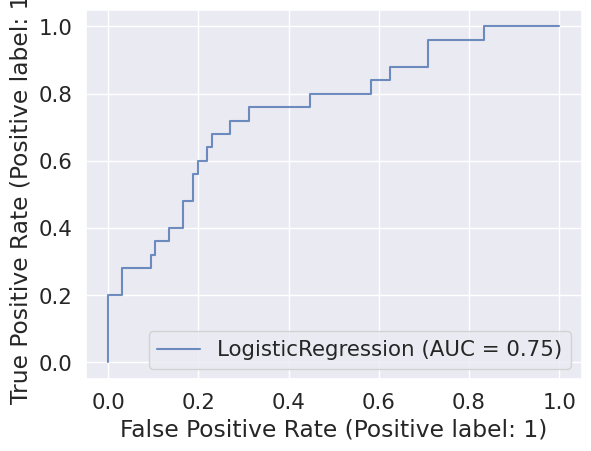

Axes(0.125,0.11;0.775x0.77)


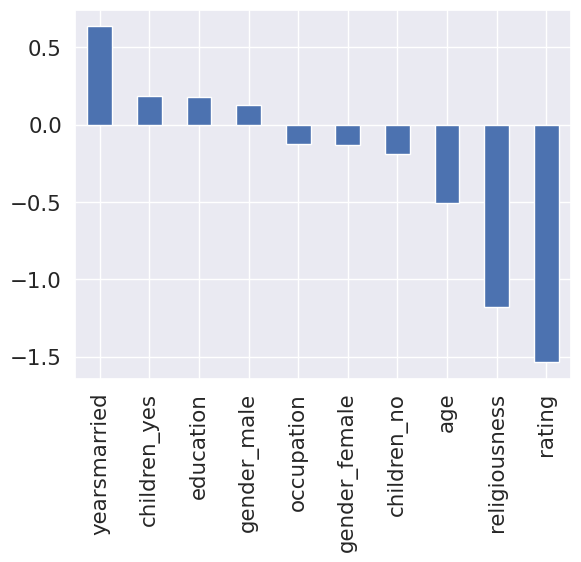

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model_log.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:15].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


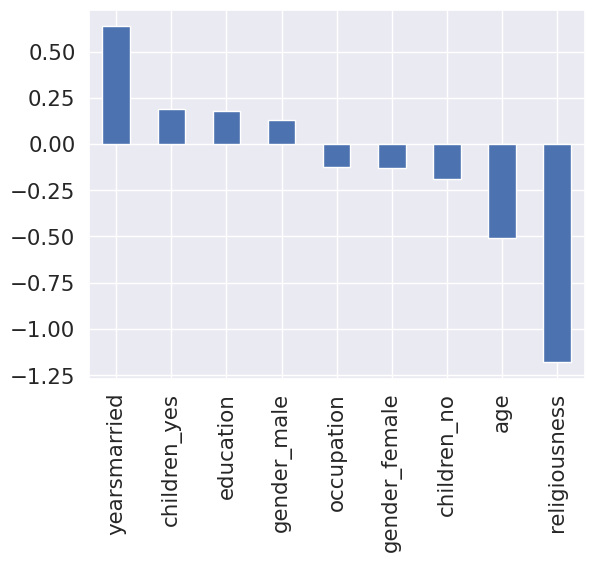

In [ ]:
print(weights.sort_values(ascending = False)[-10:-1].plot(kind='bar'))

2.SVM

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf')
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)

0.7933884297520661

Text(0.5, 14.049999999999999, 'True or not\n')

<Figure size 2800x2000 with 0 Axes>

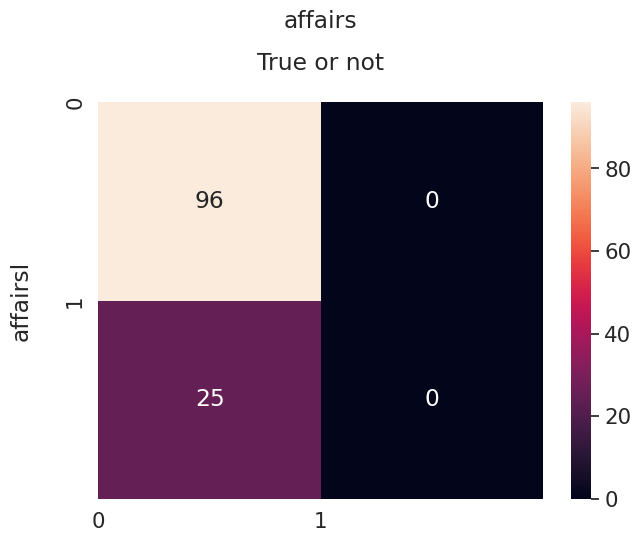

In [ ]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('affairs\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('affairsl\n')
plt.xlabel('True or not\n')

In [ ]:
get_acccuracy(cm)
get_precision(cm)
get_sensitivity(cm)
get_precision(cm)

accurancy 0.7933884297520661
precision: 0.0
sensitivity 0.0
precision: 0.0


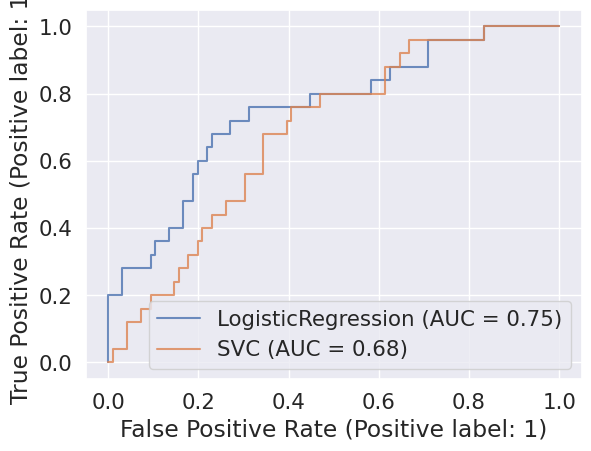

In [ ]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

preprocessor = make_pipeline(SelectKBest(f_classif, k=10))  # 僅保留好的K個變數
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))

In [ ]:
SVM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'standardscaler', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [ ]:
hyper_params_svm = {'svc__gamma':[0.001, 0.0001, 0.0005], 'svc__C':[1, 10, 100, 1000, 3000],}

In [ ]:
grid_svm = GridSearchCV(SVM, hyper_params_svm,scoring='recall', cv=3) # GridSearchCV:網格搜索, cv:交叉驗證
grid_svm.fit(X_train, y_train)

print(grid_svm.best_params_)

{'svc__C': 1, 'svc__gamma': 0.001}


In [ ]:
y_test_pred_gridsvm = grid_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridsvm)

0.7933884297520661

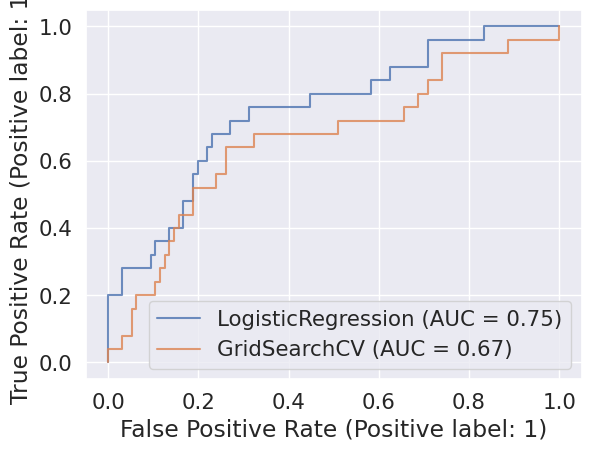

In [ ]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_svm_disp = RocCurveDisplay.from_estimator(grid_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

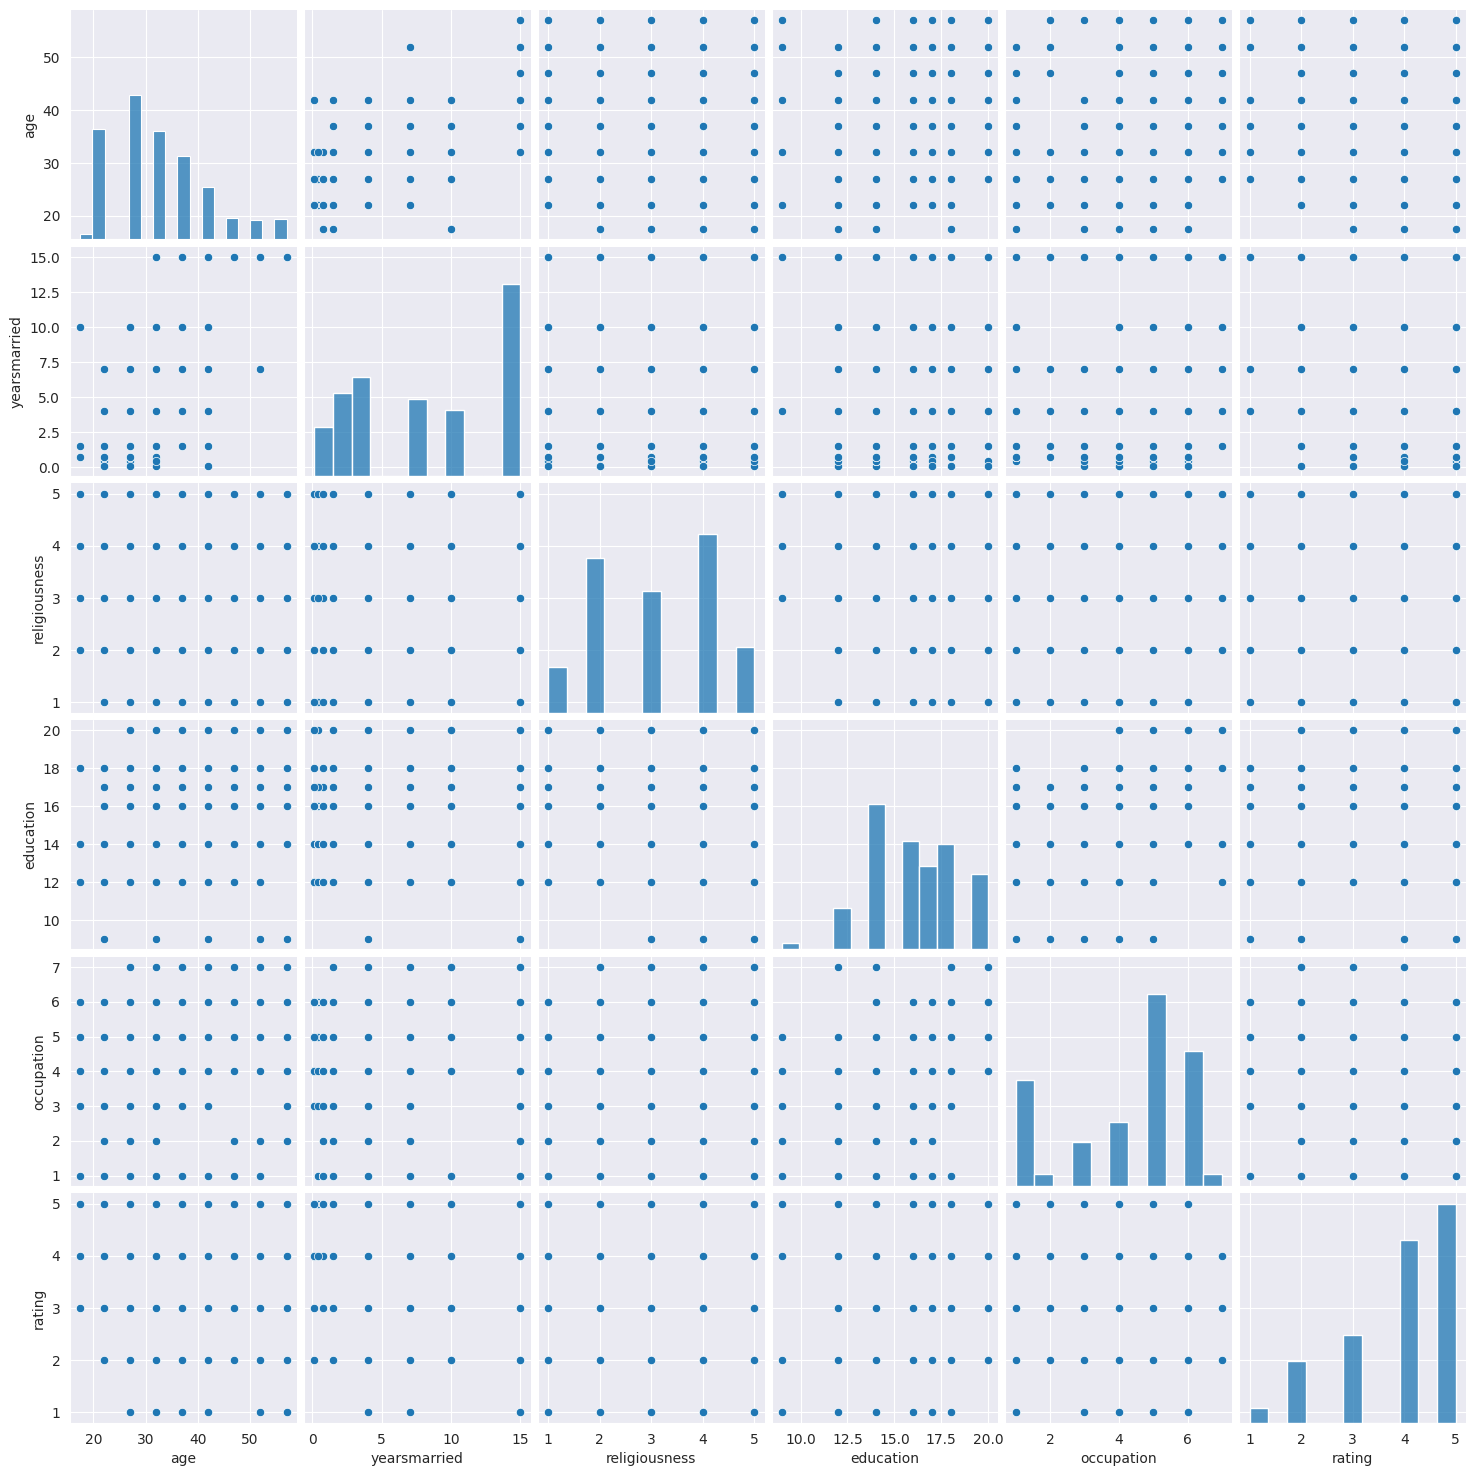

In [12]:
sns.pairplot(df_dummies[['age',	'yearsmarried',	'religiousness',	'education',	'occupation',	'rating']])

3.decision tree


In [ ]:

from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'gini')  # CART, 默認為gini
clf = model_dt.fit(X_train, y_train)

# Make predictions
y_test_pred_dt = model_dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_dt))

0.6446280991735537


Text(0.5, 14.049999999999999, 'True or not\n')

<Figure size 2800x2000 with 0 Axes>

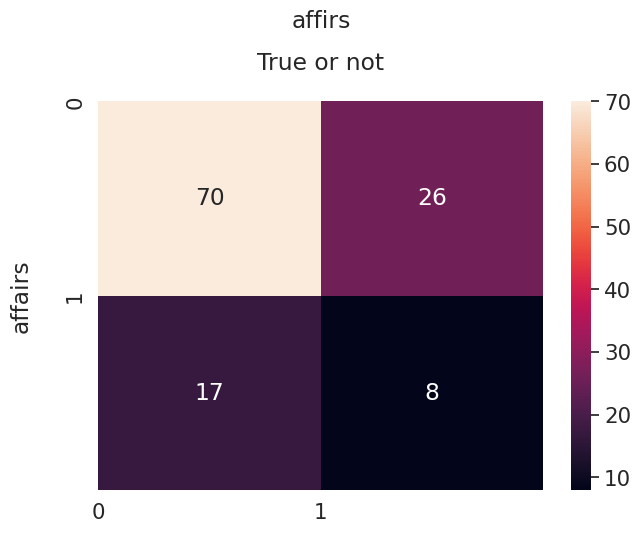

In [ ]:

# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('affirs\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('affairs\n')
plt.xlabel('True or not\n')

In [ ]:

sns.pairplot(dataset[['affairs']])

In [ ]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=8)) # 挑選出K個分數最高的特徵
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))

In [ ]:
DecisionTree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'decisiontreeclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [ ]:
hyper_params_dt = {
    'decisiontreeclassifier__max_leaf_nodes':[10,20,30],    # 最多有多少個leaf nodes
    'decisiontreeclassifier__min_samples_leaf': [5,10,15],  # 要成為leaf nodes，最少需要多少資料
    'decisiontreeclassifier__max_depth': [5,10,15]          # 限制樹的高度最多幾層
}

In [ ]:
grid_dt = GridSearchCV(DecisionTree, hyper_params_dt, scoring='recall', cv=3)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

{'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_samples_leaf': 10}


In [ ]:
y_test_pred_griddt = grid_dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_griddt)

0.7355371900826446

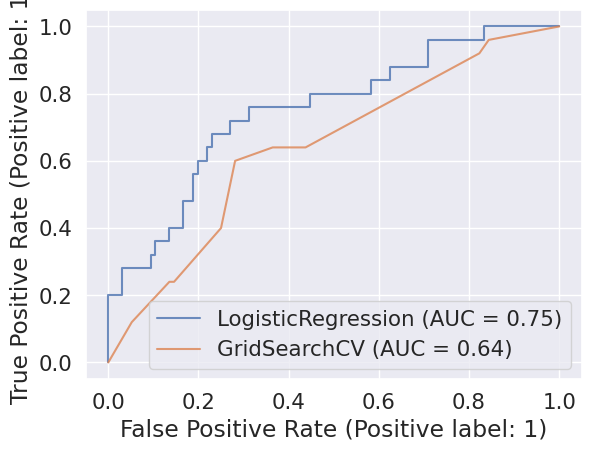

In [ ]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_dt_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
from sklearn import tree
print(tree.export_text(model_dt))

|--- feature_5 <= 0.38
|   |--- feature_0 <= 0.81
|   |   |--- feature_0 <= 0.30
|   |   |   |--- feature_3 <= 0.68
|   |   |   |   |--- feature_3 <= 0.36
|   |   |   |   |   |--- feature_4 <= 0.33
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  0.33
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  0.36
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.68
|   |   |   |   |--- feature_2 <= 0.62
|   |   |   |   |   |--- feature_3 <= 0.91
|   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.12
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  0.12
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.18
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  0.18
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |--- class: 1

Number of elements in the first column: 150
[0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1]
accurancy 0.8333333333333334
precision: 0.6
sensitivity 0.84
precision: 0.6


<Figure size 2800x2000 with 0 Axes>

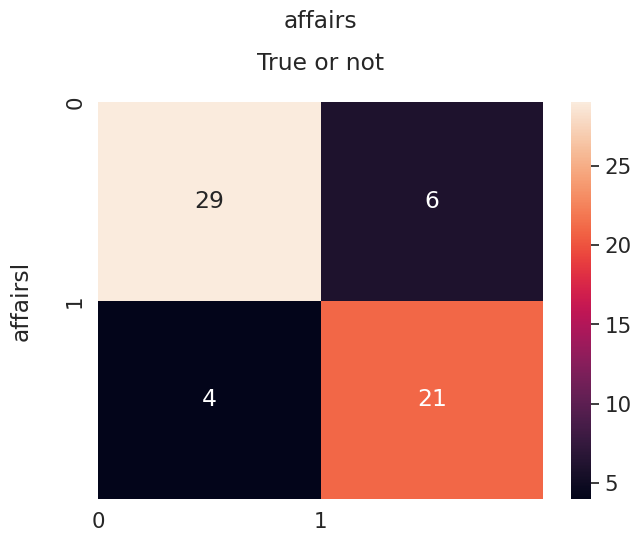

In [32]:
from sklearn.metrics import RocCurveDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

affair_numbers = len(df_dummies[df_dummies['affairs'] == 1].index)
normal_numbers = len(df_dummies[df_dummies['affairs'] == 0].index)

# 输出结果
total_number = affair_numbers + normal_numbers
print(f"Number of elements in the first column: {affair_numbers}")

affair_all = np.array(df_dummies[df_dummies['affairs'] == 1].index)
normal_non_affair = df_dummies[df_dummies['affairs'] == 0].index

random_normal = np.random.choice(normal_non_affair, affair_numbers, replace=False)
random_normal = np.array(random_normal)

index_s = np.concatenate([affair_all, random_normal])

combine_data = df_dummies.iloc[index_s, :]  # new df

sc = StandardScaler()

amount = combine_data.iloc[:, 0].values
combine_data['new'] = sc.fit_transform(amount.reshape(-1, 1))  # Reshape the input

X = combine_data.iloc[:, 0:]  # Exclude the target column
y = combine_data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)  # 分割訓練集跟測試集

from sklearn.svm import SVC

model_svm = SVC(kernel='rbf')
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)
print(y_test_pred_svm)
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('affairs\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('affairsl\n')
plt.xlabel('True or not\n')

get_acccuracy(cm)
get_precision(cm)
get_sensitivity(cm)
get_precision(cm)
